In [9]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd
import seaborn

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model

Using cache found in C:\Users\fb/.cache\torch\hub\ultralytics_yolov5_master


  0%|          | 0.00/755k [00:00<?, ?B/s]

YOLOv5  2021-9-5 torch 1.8.1+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

In [8]:
%cd C:\Users\fb\Desktop\StriveAI\LogoAI

C:\Users\fb\Desktop\StriveAI\LogoAI


In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='models/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\fb/.cache\torch\hub\master.zip
YOLOv5  2021-9-5 torch 1.8.1+cpu CPU

Fusing layers... 
Model Summary: 224 layers, 7137517 parameters, 0 gradients, 16.6 GFLOPs
Adding AutoShape... 


In [51]:
img = 'sample/1.jpg'
results = model(img)
results.print()

image 1/1: 1024x683 1 Guinness
Speed: 19.0ms pre-process, 482.7ms inference, 2.0ms NMS per image at shape (1, 3, 640, 448)


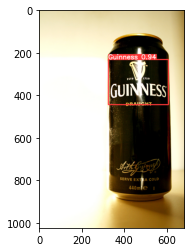

In [52]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
#test on the camera

In [46]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    
    cv2.imshow('LogoAI', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#test on the dowloadable video

In [48]:
import pafy
import cv2

url = "https://www.youtube.com/watch?v=TnSN42BgT94"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

In [50]:
cap = cv2.VideoCapture(best.url)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    
    cv2.imshow('LogoAI', np.squeeze(results.render()))
    
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()